# Pre Lab

In [87]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la
import math
from scipy.integrate import quad

In [88]:
def eval_legendre(n,x):
    
    p = np.zeros(n+1)
    
    p[0] = 1
    p[1] = x
    
    for i in range(1,n):
        p[i+1] = (1/(i+1))*((2*i+1)*x*p[i] - i*p[i-1])
        
    return p

In [89]:
def eval_legendre_expansion(f,a,b,w,n,x): 

#   This subroutine evaluates the Legendre expansion

#  Evaluate all the Legendre polynomials at x that are needed
# by calling your code from prelab 
  p = eval_legendre(n,x)
  # initialize the sum to 0 
  pval = 0.0    
  for j in range(0,n+1):
      # make a function handle for evaluating phi_j(x)
      phi_j = lambda x: eval_legendre(n, x)[j]
      # make a function handle for evaluating phi_j^2(x)*w(x)
      phi_j_sq = lambda x: phi_j(x)**2*w(x)
      # use the quad function from scipy to evaluate normalizations
      norm_fac,err = quad(phi_j_sq, a, b)
      # make a function handle for phi_j(x)*f(x)*w(x)/norm_fac
      func_j = lambda x: (phi_j(x)*f(x)*w(x))/norm_fac
      # use the quad function from scipy to evaluate coeffs
      aj,err = quad(func_j,a,b)
      # accumulate into pval
      pval = pval+aj*p[j] 
       
  return pval

def driver(f):

#  function you want to approximate
    #f = lambda x: math.exp(x)

# Interval of interest    
    a = -1
    b = 1
# weight function    
    w = lambda x: 1.

# order of approximation
    n = 2

#  Number of points you want to sample in [a,b]
    N = 1000
    xeval = np.linspace(a,b,N+1)
    pval = np.zeros(N+1)

    for kk in range(N+1):
      pval[kk] = eval_legendre_expansion(f,a,b,w,n,xeval[kk])
      
    ''' create vector with exact values'''
    fex = np.zeros(N+1)
    for kk in range(N+1):
        fex[kk] = f(xeval[kk])
        
    plt.figure()    
    plt.plot(xeval,fex,'ro-', label= 'f(x)')
    plt.plot(xeval,pval,'bs--',label= 'Expansion') 
    plt.legend()
    plt.show()    
    
    err_l = abs(pval-fex)
    plt.semilogy(xeval,err_l,'ro--',label='error')
    plt.legend()
    plt.show()
    

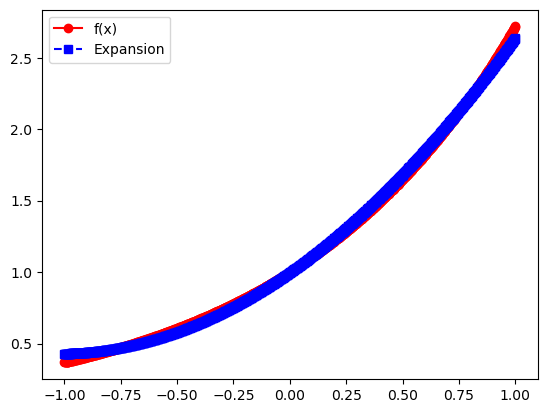

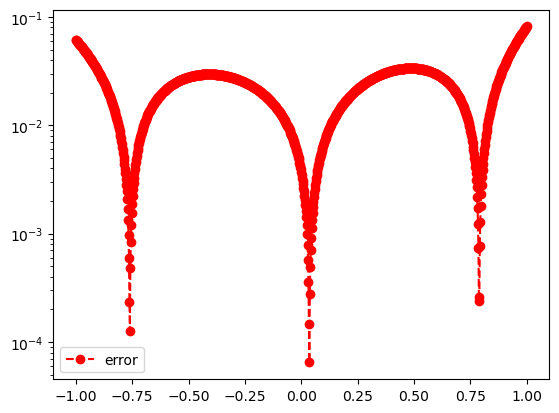

In [90]:
driver(lambda x: math.exp(x))

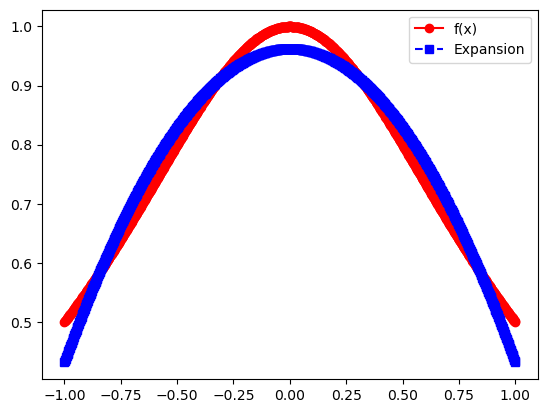

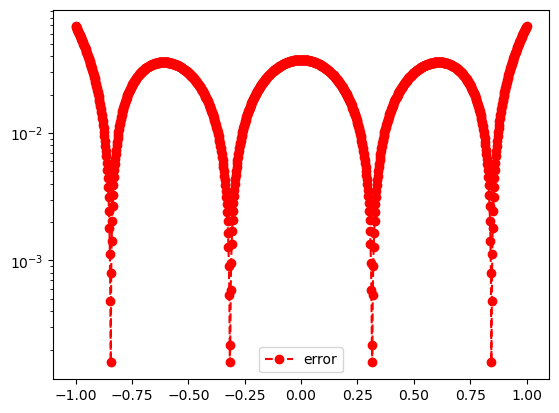

In [91]:
driver(lambda x: 1/(1+(x*x)))

In [102]:
def eval_T(n, x):
    T = np.zeros(n+1)
    
    T[0] = 1
    T[1] = x
    for i in range(1,n):
        T[i+1] = 2*x*T[i]-T[i-1]
    return T

In [105]:
def eval_legendre_expansion_T(f,a,b,w,n,x): 

#   This subroutine evaluates the Legendre expansion

#  Evaluate all the Legendre polynomials at x that are needed
# by calling your code from prelab 
  T = eval_T(n,x)
  # initialize the sum to 0 
  Tval = 0.0    
  for j in range(0,n+1):
      # make a function handle for evaluating phi_j(x)
      phi_j = lambda x: eval_T(n, x)[j]
      # make a function handle for evaluating phi_j^2(x)*w(x)
      phi_j_sq = lambda x: phi_j(x)**2*w(x)
      # use the quad function from scipy to evaluate normalizations
      norm_fac,err = quad(phi_j_sq, a, b)
      # make a function handle for phi_j(x)*f(x)*w(x)/norm_fac
      func_j = lambda x: (phi_j(x)*f(x)*w(x))/norm_fac
      # use the quad function from scipy to evaluate coeffs
      aj,err = quad(func_j,a,b)
      # accumulate into pval
      Tval = Tval+aj*T[j] 
       
  return Tval

def driverT(f):

#  function you want to approximate
    #f = lambda x: math.exp(x)

# Interval of interest    
    a = -1
    b = 1
# weight function    
    w = lambda x: 1./(math.sqrt(1.-x**2))

# order of approximation
    n = 2

#  Number of points you want to sample in [a,b]
    N = 1000
    xeval = np.linspace(a,b,N+1)
    Tval = np.zeros(N+1)

    for kk in range(N+1):
      Tval[kk] = eval_legendre_expansion_T(f,a,b,w,n,xeval[kk])
      
    ''' create vector with exact values'''
    fex = np.zeros(N+1)
    for kk in range(N+1):
        fex[kk] = f(xeval[kk])
        
    plt.figure()    
    plt.plot(xeval,fex,'ro-', label= 'f(x)')
    plt.plot(xeval,Tval,'bs--',label= 'Expansion') 
    plt.legend()
    plt.show()    
    
    err_l = abs(Tval-fex)
    plt.semilogy(xeval,err_l,'ro--',label='error')
    plt.legend()
    plt.show()
    

In [ ]:
driverT(lambda x: math.exp(x))